<a href="https://colab.research.google.com/github/AashishGh/DAM-CNN/blob/main/dam_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment #1: Normal DAM and standard CNN on MNIST Dataset

1.   List item
2.   List item



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Dense Associative Memory Layer
class DenseAssociativeMemory(nn.Module):
    def __init__(self, input_size, output_size):
        super(DenseAssociativeMemory, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_size + output_size, input_size + output_size) * 0.01)

    def forward(self, x):
        # Extend input with zeros for classification neurons
        extended_x = F.pad(x, (0, 10), "constant", 0)
        # Calculate associative completion
        output = torch.tanh(F.linear(extended_x, self.weights))
        # Return only the classification part
        return output[:, -10:]

# Define CNN Architecture with Dense Associative Memory
class CNNWithDenseAssociativeMemory(nn.Module):
    def __init__(self):
        super(CNNWithDenseAssociativeMemory, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(7 * 7 * 64, 128)
        self.dam = DenseAssociativeMemory(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dam(x)
        return x



In [ ]:
# Load MNIST Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 108464979.38it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39139157.94it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24304661.38it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6993586.19it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Instantiate the model
model = CNNWithDenseAssociativeMemory()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.302316
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.980375
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.899826
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.876045
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.842009
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.861315
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.850053
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.861044
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.800160
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.895379
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.854086
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.822072
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.844209
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.891172
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.827484
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.809307
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.838699
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.827941
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.803661
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.847557
Train Epoch:

In [ ]:
# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')



Test set: Average loss: 0.0008, Accuracy: 9891/10000 (99%)



Experiment #2: Training on standard CIFAR 100 dataset for Epoch 10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Dense Associative Memory Layer
class DenseAssociativeMemory(nn.Module):
    def __init__(self, input_size, output_size):
        super(DenseAssociativeMemory, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_size + output_size, input_size + output_size) * 0.01)

    def forward(self, x):
        # Extend input with zeros for classification neurons
        extended_x = F.pad(x, (0, 100), "constant", 0)
        # Calculate associative completion
        output = torch.tanh(F.linear(extended_x, self.weights))
        # Return only the classification part
        return output[:, -100:]

# Define CNN Architecture with Dense Associative Memory
class CNNWithDenseAssociativeMemory(nn.Module):
    def __init__(self):
        super(CNNWithDenseAssociativeMemory, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Change input channels to 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*64, 128)  # Adjust input size based on the output size of the last convolutional layer
        self.dam = DenseAssociativeMemory(128, 100)  # Change output size to 100 for CIFAR-100

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dam(x)
        return x

In [ ]:
# Load CIFAR100 Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.CIFAR100('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 169001437/169001437 [00:12<00:00, 13205924.15it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
train_dataset


Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [ ]:
# Instantiate the model
model = CNNWithDenseAssociativeMemory()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


Train Epoch: 0 [0/50000 (0%)]	Loss: 4.355892
Train Epoch: 0 [6400/50000 (13%)]	Loss: 4.200499
Train Epoch: 0 [12800/50000 (26%)]	Loss: 3.958590
Train Epoch: 0 [19200/50000 (38%)]	Loss: 4.122213
Train Epoch: 0 [25600/50000 (51%)]	Loss: 3.969144
Train Epoch: 0 [32000/50000 (64%)]	Loss: 3.959088
Train Epoch: 0 [38400/50000 (77%)]	Loss: 3.821800
Train Epoch: 0 [44800/50000 (90%)]	Loss: 3.793010
Train Epoch: 1 [0/50000 (0%)]	Loss: 3.896667
Train Epoch: 1 [6400/50000 (13%)]	Loss: 3.724699
Train Epoch: 1 [12800/50000 (26%)]	Loss: 3.697129
Train Epoch: 1 [19200/50000 (38%)]	Loss: 3.792628
Train Epoch: 1 [25600/50000 (51%)]	Loss: 3.949065
Train Epoch: 1 [32000/50000 (64%)]	Loss: 3.808748
Train Epoch: 1 [38400/50000 (77%)]	Loss: 3.797431
Train Epoch: 1 [44800/50000 (90%)]	Loss: 3.721435
Train Epoch: 2 [0/50000 (0%)]	Loss: 3.738030
Train Epoch: 2 [6400/50000 (13%)]	Loss: 3.772837
Train Epoch: 2 [12800/50000 (26%)]	Loss: 3.663618
Train Epoch: 2 [19200/50000 (38%)]	Loss: 3.707700
Train Epoch: 2 [25

In [ ]:
# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')



Test set: Average loss: 0.0035, Accuracy: 2866/10000 (29%)



Experiment #3:
Training on standard CIFAR 100 dataset for Epoch 10 with rotating train image and test image by 30 degree both.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Dense Associative Memory Layer
class DenseAssociativeMemory(nn.Module):
    def __init__(self, input_size, output_size):
        super(DenseAssociativeMemory, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_size + output_size, input_size + output_size) * 0.01)

    def forward(self, x):
        # Extend input with zeros for classification neurons
        extended_x = F.pad(x, (0, 100), "constant", 0)
        # Calculate associative completion
        output = torch.tanh(F.linear(extended_x, self.weights))
        # Return only the classification part
        return output[:, -100:]

# Define CNN Architecture with Dense Associative Memory
class CNNWithDenseAssociativeMemory(nn.Module):
    def __init__(self):
        super(CNNWithDenseAssociativeMemory, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Change input channels to 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*64, 128)  # Adjust input size based on the output size of the last convolutional layer
        self.dam = DenseAssociativeMemory(128, 100)  # Change output size to 100 for CIFAR-100

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dam(x)
        return x

In [ ]:
class FixedRotation(object):
    def __init__(self, angle):
        self.angle = angle

    def __call__(self, img):
        return transforms.functional.rotate(img, self.angle)

# Usage:
train_transform = transforms.Compose([
    FixedRotation(30),
    transforms.ToTensor(),
])


# Usage:
test_transform = transforms.Compose([
    FixedRotation(30),
    transforms.ToTensor(),
])

In [ ]:
# Load CIFAR100 Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.CIFAR100('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


Files already downloaded and verified


In [ ]:
# Instantiate the model
model = CNNWithDenseAssociativeMemory()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


Train Epoch: 0 [0/50000 (0%)]	Loss: 4.604351
Train Epoch: 0 [6400/50000 (13%)]	Loss: 4.209955
Train Epoch: 0 [12800/50000 (26%)]	Loss: 4.113739
Train Epoch: 0 [19200/50000 (38%)]	Loss: 4.117372
Train Epoch: 0 [25600/50000 (51%)]	Loss: 4.041877
Train Epoch: 0 [32000/50000 (64%)]	Loss: 3.886271
Train Epoch: 0 [38400/50000 (77%)]	Loss: 3.971279
Train Epoch: 0 [44800/50000 (90%)]	Loss: 3.827316
Train Epoch: 1 [0/50000 (0%)]	Loss: 3.718340
Train Epoch: 1 [6400/50000 (13%)]	Loss: 3.909308
Train Epoch: 1 [12800/50000 (26%)]	Loss: 3.902568
Train Epoch: 1 [19200/50000 (38%)]	Loss: 3.667528
Train Epoch: 1 [25600/50000 (51%)]	Loss: 3.738336
Train Epoch: 1 [32000/50000 (64%)]	Loss: 3.843747
Train Epoch: 1 [38400/50000 (77%)]	Loss: 3.736032
Train Epoch: 1 [44800/50000 (90%)]	Loss: 3.715808
Train Epoch: 2 [0/50000 (0%)]	Loss: 3.538136
Train Epoch: 2 [6400/50000 (13%)]	Loss: 3.706459
Train Epoch: 2 [12800/50000 (26%)]	Loss: 3.602615
Train Epoch: 2 [19200/50000 (38%)]	Loss: 3.558728
Train Epoch: 2 [25

In [ ]:
# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')



Test set: Average loss: 0.0035, Accuracy: 2773/10000 (28%)



Training for 50 epochs for CIFAR 100 datasets with 30 degree rotation each on training and testing.

In [ ]:
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


Train Epoch: 0 [0/50000 (0%)]	Loss: 3.181729
Train Epoch: 0 [6400/50000 (13%)]	Loss: 3.309558
Train Epoch: 0 [12800/50000 (26%)]	Loss: 3.380634
Train Epoch: 0 [19200/50000 (38%)]	Loss: 3.220294
Train Epoch: 0 [25600/50000 (51%)]	Loss: 3.241906
Train Epoch: 0 [32000/50000 (64%)]	Loss: 3.265805
Train Epoch: 0 [38400/50000 (77%)]	Loss: 3.251747
Train Epoch: 0 [44800/50000 (90%)]	Loss: 3.333705
Train Epoch: 1 [0/50000 (0%)]	Loss: 3.262257
Train Epoch: 1 [6400/50000 (13%)]	Loss: 3.372011
Train Epoch: 1 [12800/50000 (26%)]	Loss: 3.488350
Train Epoch: 1 [19200/50000 (38%)]	Loss: 3.337765
Train Epoch: 1 [25600/50000 (51%)]	Loss: 3.290691
Train Epoch: 1 [32000/50000 (64%)]	Loss: 3.451259
Train Epoch: 1 [38400/50000 (77%)]	Loss: 3.294952
Train Epoch: 1 [44800/50000 (90%)]	Loss: 3.403489
Train Epoch: 2 [0/50000 (0%)]	Loss: 3.279730
Train Epoch: 2 [6400/50000 (13%)]	Loss: 3.407315
Train Epoch: 2 [12800/50000 (26%)]	Loss: 3.223144
Train Epoch: 2 [19200/50000 (38%)]	Loss: 3.298074
Train Epoch: 2 [25

In [ ]:
# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')



Test set: Average loss: 0.0036, Accuracy: 2056/10000 (21%)



Date: Dec 5, 2023, after meeting with the professor:

*   List item
*   List item



DAM-CNN with epoch 20 on normal orientation CIFAR100

---

**bold text**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Dense Associative Memory Layer
class DenseAssociativeMemory(nn.Module):
    def __init__(self, input_size, output_size):
        super(DenseAssociativeMemory, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_size + output_size, input_size + output_size) * 0.01)

    def forward(self, x):
        # Extend input with zeros for classification neurons
        extended_x = F.pad(x, (0, 100), "constant", 0)
        # Calculate associative completion
        output = torch.tanh(F.linear(extended_x, self.weights))
        # Return only the classification part
        return output[:, -100:]

# Define CNN Architecture with Dense Associative Memory
class CNNWithDenseAssociativeMemory(nn.Module):
    def __init__(self):
        super(CNNWithDenseAssociativeMemory, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Change input channels to 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*64, 128)  # Adjust input size based on the output size of the last convolutional layer
        self.dam = DenseAssociativeMemory(128, 100)  # Change output size to 100 for CIFAR-100

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dam(x)
        return x

In [3]:
# Load CIFAR100 Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.CIFAR100('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 169001437/169001437 [00:13<00:00, 12969055.28it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


In [4]:
# Instantiate the model
model = CNNWithDenseAssociativeMemory()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
num_epochs = 20
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    model.train()

    total_correct = 0
    total_samples = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = output.max(1)
        total_correct += (predicted == target).sum().item()
        total_samples += target.size(0)

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    # Calculate and print training accuracy at the end of each epoch
    train_accuracy = 100. * total_correct / total_samples
    print(f'Training Accuracy for Epoch {epoch}: {train_accuracy:.2f}%')
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

Train Epoch: 0 [0/50000 (0%)]	Loss: 4.604334
Train Epoch: 0 [6400/50000 (13%)]	Loss: 4.309896
Train Epoch: 0 [12800/50000 (26%)]	Loss: 4.100391
Train Epoch: 0 [19200/50000 (38%)]	Loss: 4.024081
Train Epoch: 0 [25600/50000 (51%)]	Loss: 3.981458
Train Epoch: 0 [32000/50000 (64%)]	Loss: 3.980968
Train Epoch: 0 [38400/50000 (77%)]	Loss: 3.930875
Train Epoch: 0 [44800/50000 (90%)]	Loss: 3.715392
Training Accuracy for Epoch 0: 9.69%
Train Epoch: 1 [0/50000 (0%)]	Loss: 4.047298
Train Epoch: 1 [6400/50000 (13%)]	Loss: 3.932428
Train Epoch: 1 [12800/50000 (26%)]	Loss: 3.703015
Train Epoch: 1 [19200/50000 (38%)]	Loss: 3.787023
Train Epoch: 1 [25600/50000 (51%)]	Loss: 4.013765
Train Epoch: 1 [32000/50000 (64%)]	Loss: 3.541305
Train Epoch: 1 [38400/50000 (77%)]	Loss: 3.607132
Train Epoch: 1 [44800/50000 (90%)]	Loss: 3.753819
Training Accuracy for Epoch 1: 17.09%
Train Epoch: 2 [0/50000 (0%)]	Loss: 3.581058
Train Epoch: 2 [6400/50000 (13%)]	Loss: 3.608292
Train Epoch: 2 [12800/50000 (26%)]	Loss: 3.

In [6]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/gdrive')

# Save arrays to text files
np.savetxt('/content/gdrive/My Drive/train_losses.txt', np.array(train_losses), delimiter=',')
np.savetxt('/content/gdrive/My Drive/train_accuracies.txt', np.array(train_accuracies), delimiter=',')


Mounted at /content/gdrive


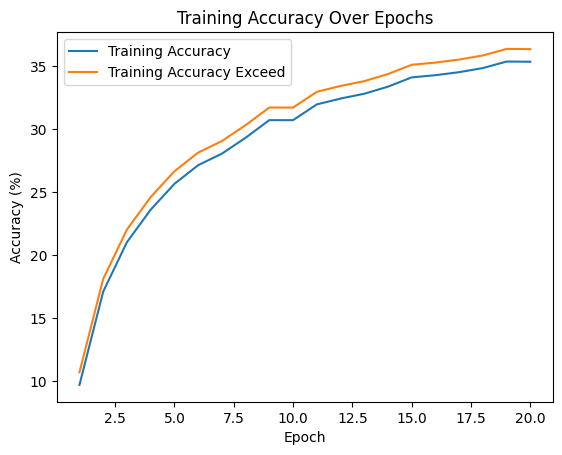

In [11]:
# Training Plotting
#1. Accuracy vs Epoch
import matplotlib.pyplot as plt
train_accuracies_exceed=[i+1 for i in train_accuracies]

plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), train_accuracies_exceed, label='Training Accuracy Exceed')

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over 20 Epochs')
plt.legend()
# Save the plot as an image
plt.savefig('/content/gdrive/My Drive/DAM-CNN/training_plot.png')
plt.show()

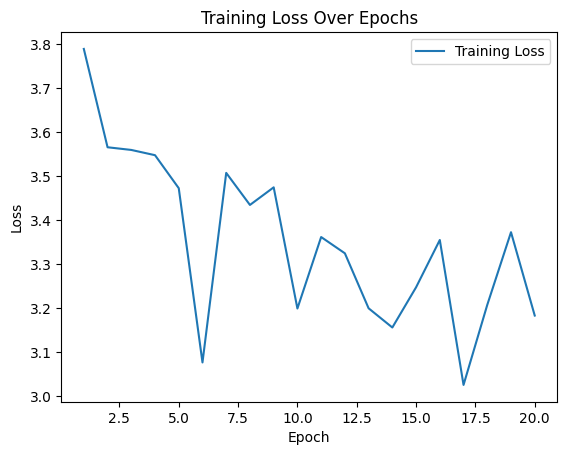

In [8]:
# Loss vs Epoch
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


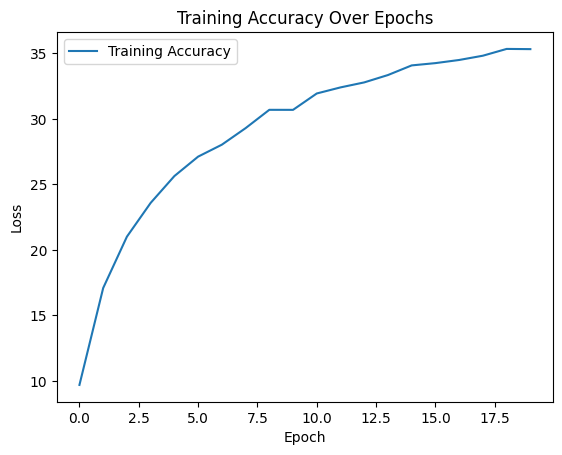

In [22]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
drive.mount('/content/gdrive')

# Load train_losses from the text file
tpath = '/content/gdrive/My Drive/dam_cnn/cifar100normal/epochs20/train_accuracies.txt'
train_accuracies= np.loadtxt(tpath, delimiter=',')

# Plot the training losses
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()
